# Intro to regression with neural network


In [1]:
import tensorflow as tf #The Notebook was re-used on Macbook M1 using Metal plug-in.
print(tf.__version__)
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True

2.16.1


2024-04-23 21:01:23.785112: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2024-04-23 21:01:23.785176: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-23 21:01:23.785195: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-23 21:01:23.785247: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-23 21:01:23.785298: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


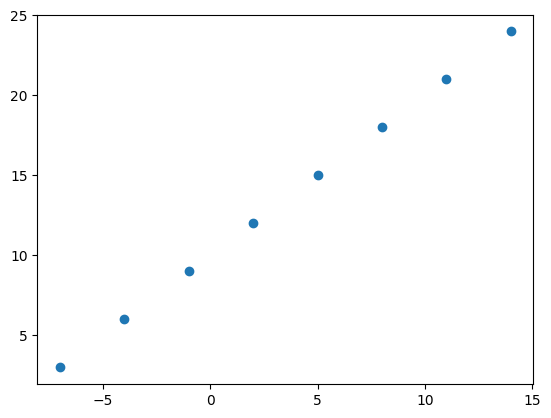

In [2]:
# Creating the data top view and fit
sess = tf.compat.v1.Session(config=config)
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

plt.scatter(X, y)

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Inputs and Output Shapes

In [4]:
#Demo
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

2024-04-23 21:02:03.616359: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-23 21:02:03.616816: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[0].ndim

0

In [8]:
#Turn our Numpy arrays into Tensors

x = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

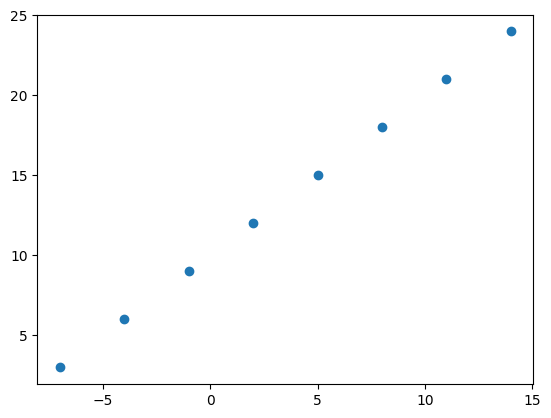

In [10]:
plt.scatter(x, y)

In [15]:
# Set seed
tf.random.set_seed(42)

#Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
    # tf.keras.layers.Dense(1)
])

#mae - Mean Absolute Error
model.compile(loss = tf.keras.losses.mae, 
              optimizer= tf.keras.optimizers.SGD(),
              metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=75)


Epoch 1/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 9.6124 - mae: 9.6124
Epoch 2/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.4799 - mae: 9.4799
Epoch 3/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.3474 - mae: 9.3474
Epoch 4/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.2149 - mae: 9.2149
Epoch 5/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 9.0824 - mae: 9.0824
Epoch 6/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.9499 - mae: 8.9499
Epoch 7/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.8174 - mae: 8.8174
Epoch 8/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.6849 - mae: 8.6849
Epoch 9/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.5524 - mae: 8.5524
Epoch 10/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4199 - mae: 8.4199
Epoch 11/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.2874 - mae: 8.2874
Epoch 12/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.1549 - mae: 8.1549
Epoch 13/75
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.022

In [16]:
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [34]:
val = np.array([17.0])
model.predict(val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[29.602453]], dtype=float32)

In [35]:
val = np.array([14.0])
y_pred = model.predict(val)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


array([[24.485256]], dtype=float32)

# Improving our Model

In [36]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step - loss: 8.4060 - mae: 8.4060
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 8.2735 - mae: 8.2735
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 8.1410 - mae: 8.1410
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 8.0085 - mae: 8.0085
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.8760 - mae: 7.8760
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 7.7435 - mae: 7.7435
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.6110 - mae: 7.6110
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4785 - mae: 7.4785
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.4400 - mae: 7.4400
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.4344 - mae: 7.4344
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 7.4288 - mae: 7.4288
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 7.4231 - mae: 7.4231
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/st

In [37]:
X

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])

In [38]:
y


<tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>

In [40]:
val = np.array([17.0])
model.predict(val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step


array([[30.27227]], dtype=float32)

In [41]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    #tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mae",
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=["mae"])

model.fit(tf.expand_dims(X, axis=-1), y, epochs=50)

Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 12.5838 - mae: 12.5838
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 11.5350 - mae: 11.5350
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 10.4652 - mae: 10.4652
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 9.3713 - mae: 9.3713
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 8.2511 - mae: 8.2511
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 7.1020 - mae: 7.1020
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.9937 - mae: 6.9937
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 7.4384 - mae: 7.4384
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.8936 - mae: 7.8936
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 7.9388 - mae: 7.9388
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.6790 - mae: 7.6790
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 7.2088 - mae: 7.2088
Epoch 13/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss:

In [42]:
val = np.array([17.0])
model.predict(val)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step


array([[26.8441]], dtype=float32)

# Evaluating a model



In [43]:
#Bigger Data

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [44]:
# make labels
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
#visualize
import matplotlib.pyplot as plt


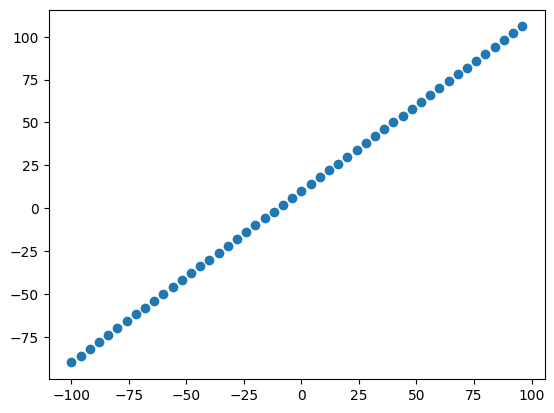

In [46]:
plt.scatter(X, y)

# 3 Sets

In [47]:
len(X)

50

In [48]:
# split the data into train and test data
X_train = X[:40] 
y_train = y[:40]
X_test = X[40:]
y_test = y[40:]

len(X_train), len(y_test)


(40, 10)

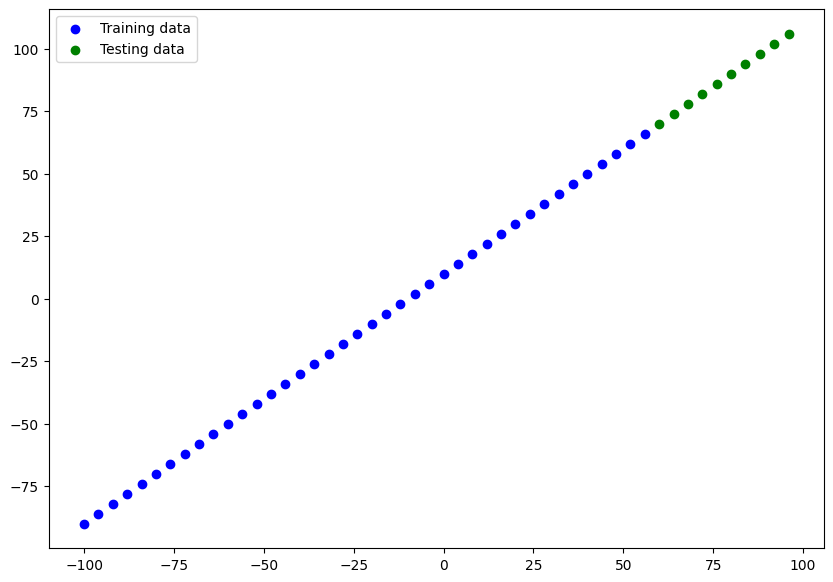

In [49]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend();

In [50]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(loss=tf.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 398ms/step - loss: 37.8692 - mae: 37.8692
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.4514 - mae: 8.4514 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.2022 - mae: 9.2022 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.2659 - mae: 8.2659 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.9414 - mae: 8.9414 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9803 - mae: 7.9803 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.6240 - mae: 9.6240 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9625 - mae: 7.9625 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6124 - mae: 9.6124 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9446 - mae: 7.9446 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6008 - mae: 9.6008 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9268 - mae: 7.9268 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9

In [51]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [54]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
],name="TensorFlow_regression")

model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=["mae"])

model.fit(X_train, y_train, epochs=50)

Epoch 1/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 483ms/step - loss: 47.2248 - mae: 47.2248
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.5610 - mae: 23.5610
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 22.6003 - mae: 22.6003 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.2221 - mae: 19.2221 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.5754 - mae: 17.5754 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 16.9419 - mae: 16.9419 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.7710 - mae: 11.7710 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.5171 - mae: 14.5171 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.9853 - mae: 15.9853 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.0517 - mae: 12.0517 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.0621 - mae: 15.0621 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.1250 - mae: 11.1250 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━

In [55]:
model.summary()

Model: "TensorFlow_regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (Dense)             │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [32]:
model.fit(tf.expand_dims(X_train,axis=-1),y_train, epochs=50, verbose=1)

Epoch 1/50
2/2 [==============================] - 0s 4ms/step - loss: 44.6884 - mae: 44.6884
Epoch 2/50
2/2 [==============================] - 0s 2ms/step - loss: 26.1055 - mae: 26.1055
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 31.7849 - mae: 31.7849
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: 25.1277 - mae: 25.1277
Epoch 5/50
2/2 [==============================] - 0s 2ms/step - loss: 14.8583 - mae: 14.8583
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 11.8185 - mae: 11.8185
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 11.1468 - mae: 11.1468
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: 11.0739 - mae: 11.0739
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: 40.3201 - mae: 40.3201
Epoch 10/50
2/2 [==============================] - 0s 2ms/step - loss: 27.7338 - mae: 27.7338
Epoch 11/50
2/2 [==============================] - 0s 2ms/step - loss

In [60]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


## Visualizing Model's prediction

In [61]:
y_pred = model.predict(X_test)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


array([[38.004807],
       [40.48148 ],
       [42.958153],
       [45.434826],
       [47.91149 ],
       [50.388165],
       [52.86484 ],
       [55.341515],
       [57.818195],
       [60.294865]], dtype=float32)

In [62]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [63]:
def plot_predictions(train_data=X_train,
                    train_labels=y_train,
                    test_data=X_test,
                     test_labels=y_test,
                    predictions = y_pred,
                    ):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c="b", label="Training Data")
    plt.scatter(test_data, test_labels, c="g", label="Testing Data")
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    plt.legend();

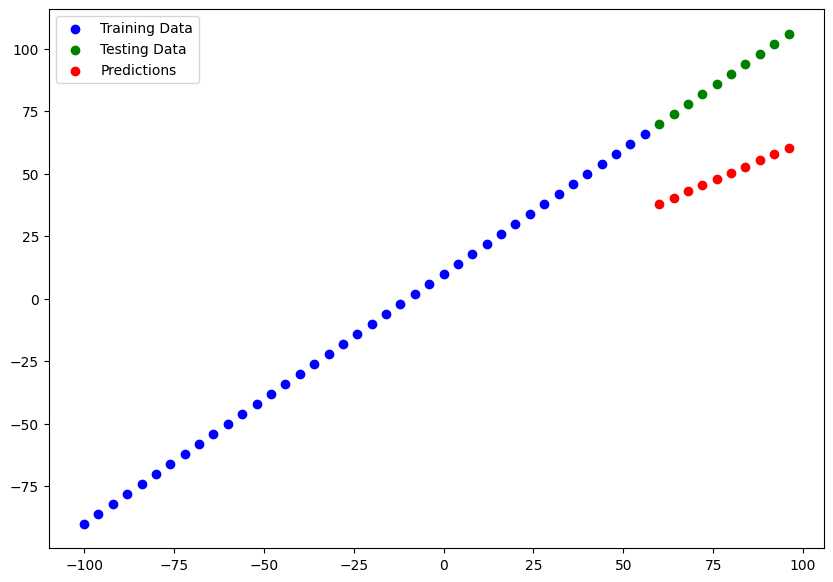

In [64]:
plot_predictions(train_data=X_train,
                train_labels=y_train,
                test_data=X_test,
                test_labels=y_test,
                predictions=y_pred,)

### Evaluating model's predictions with regression evaluation metrics

2 Main metrics:
    1) MAE - Mean Absolute Error, "On avg how wrong is each of my model's predictions"
    2) MSE - Mean Squared Error, "Square the average errors"

In [65]:
#Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 631ms/step - loss: 38.8502 - mae: 38.8502


[38.85016632080078, 38.85016632080078]

In [66]:
# Calc MAE

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=38.850166>

In [67]:
# calc MSE

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse


<tf.Tensor: shape=(), dtype=float32, numpy=1528.4797>

In [69]:
#RESHAPE REQ
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([38.004807, 40.48148 , 42.958153, 45.434826, 47.91149 , 50.388165,
       52.86484 , 55.341515, 57.818195, 60.294865], dtype=float32)>

In [70]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [71]:
# Functions to reuse MAE and MSE

def mae(y_true, y_pred):
    mae = tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return mae

def mse(y_true, y_pred):
    mse = tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))
    return mse

### Modelling expriments

1) 'model_1' - same 1 layer, trained with 100 epoch
2) 'model_2' - 2 layers, 100 epochs
3) 'model_3' - 3 layers, 40 epochs, Adam Optimizer (lr=0.1)

In [72]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

In [73]:
tf.random.set_seed(42)


model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])


model_1.fit(tf.expand_dims(X_train,axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 421ms/step - loss: 23.9530 - mae: 23.9530
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.8266 - mae: 7.8266 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 10.6974 - mae: 10.6974
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.6490 - mae: 7.6490 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8604 - mae: 11.8604 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9975 - mae: 7.9975 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.6794 - mae: 9.6794 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9796 - mae: 7.9796 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6678 - mae: 9.6678 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 7.9618 - mae: 7.9618 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.6561 - mae: 9.6561 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.9439 - mae: 7.9439 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


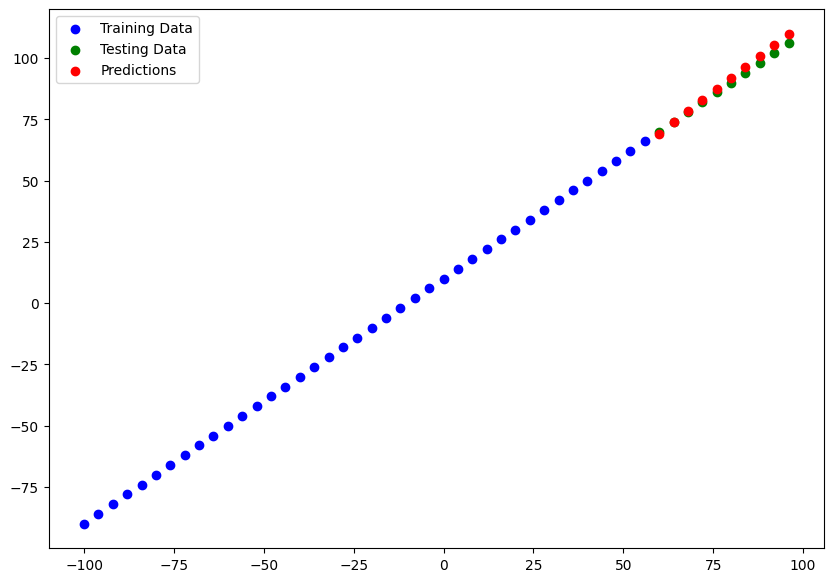

In [74]:
y_pred_1 = model_1.predict(X_test)
plot_predictions(predictions=y_pred_1)

In [75]:
mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=1.7780198>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4.7169166>)

In [76]:
# Model 2

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 543ms/step - loss: 31.8744 - mse: 1422.3159
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 26.0576 - mse: 932.0011 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 23.5974 - mse: 755.1827
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 19.9275 - mse: 536.2311 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 18.1170 - mse: 443.6432 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12.0151 - mse: 232.9619 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.6628 - mse: 301.1678 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.9421 - mse: 343.8295 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8367 - mse: 217.1815 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 14.7859 - mse: 303.2835 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.7861 - mse: 335.4980 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.9807 - mse: 216.2795 
Epoch 13/10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


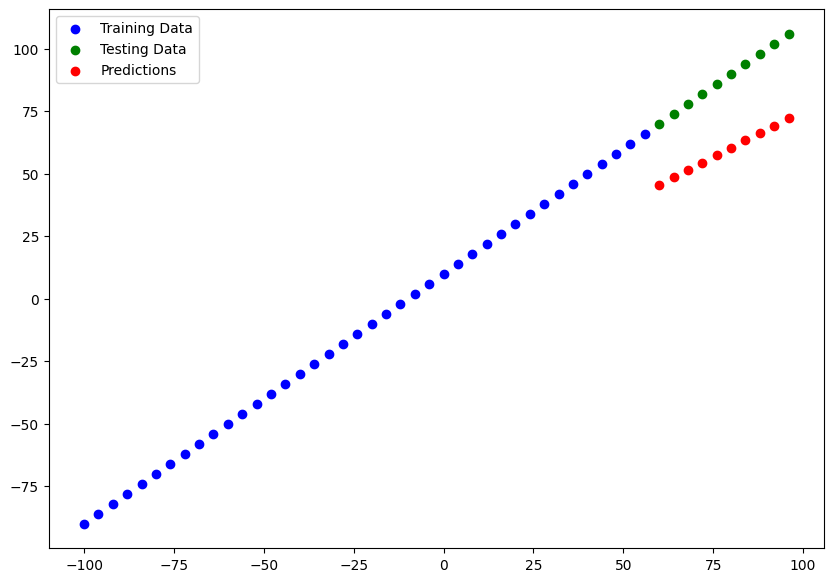

In [77]:
y_pred_2 = model_2.predict(X_test)
plot_predictions(predictions=y_pred_2)

In [78]:
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=29.086689>,
 <tf.Tensor: shape=(), dtype=float32, numpy=855.39105>)

In [79]:
# Model 3

tf.random.set_seed(42)


model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(20),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mse"]
               )

model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=40)


Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 45.9416 - mse: 2891.7297
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 14.8899 - mse: 380.0598
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 39.4679 - mse: 2121.1106
Epoch 4/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 13.6733 - mse: 256.9957
Epoch 5/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 23.4542 - mse: 827.9205
Epoch 6/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 10.6927 - mse: 160.3876
Epoch 7/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 12.1245 - mse: 204.6276
Epoch 8/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.1203 - mse: 66.9562
Epoch 9/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.1875 - mse: 26.6211
Epoch 10/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.6956 - mse: 108.8806
Epoch 11/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 13.5374 - mse: 258.9169
Epoch 12/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 7.7251 - mse: 83.7546
Epoch 13/40
2/2 ━━━━━━━━━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 366ms/step


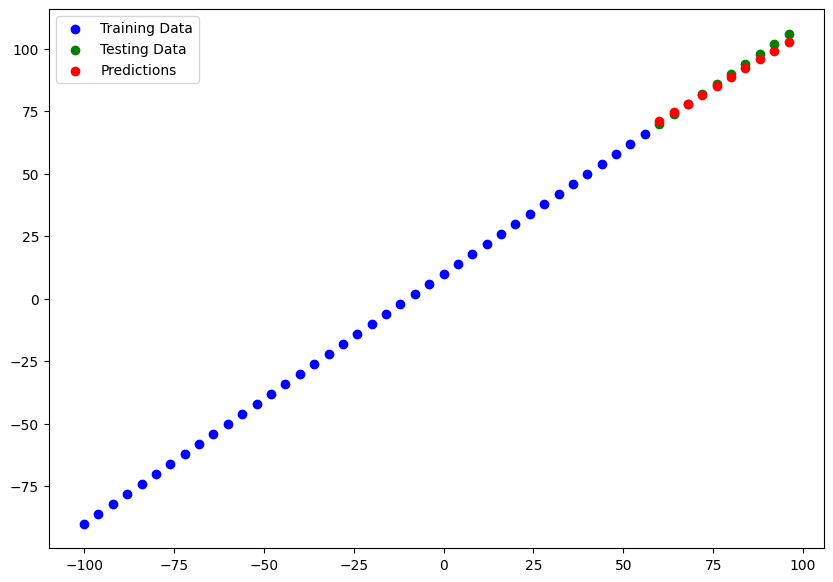

In [80]:
y_pred_3 = model_3.predict(y_test)
plot_predictions(predictions=y_pred_3)

In [81]:
y_pred_3, y_test

(array([[ 71.01166 ],
        [ 74.54385 ],
        [ 78.07606 ],
        [ 81.60826 ],
        [ 85.14045 ],
        [ 88.67265 ],
        [ 92.20485 ],
        [ 95.737045],
        [ 99.26924 ],
        [102.801445]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [82]:
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=1.4197625>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0010476>)

In [83]:
!pip install pandas

zsh:1: command not found: pip


### Comparing the results

In [84]:
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]
                 
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,1.778020,4.716917
1,model_2,29.086689,855.391052
2,model_3,1.419762,3.001048


In [85]:
 model_2.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [86]:
model_3.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 785 (3.07 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 524 (2.05 KB)

In [87]:
# Tracking your Experiments

#TensorBoard - track modelling expriments.
#Weights and Biases 

### Save the models

In [89]:
# Save the model using SavedModel format

model_2.save("model2_SavedModel_Format.keras")

In [90]:
# SAve the model using HDF5 format

model_3.save("Model3_HDF5_Format.h5")

### Loading the saved models

In [92]:
loaded_SavedModel_Format = tf.keras.models.load_model("model2_SavedModel_Format.keras")
loaded_SavedModel_Format.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 10)             │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [93]:
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_Format_preds = loaded_SavedModel_Format.predict(X_test)
model_2_preds == loaded_SavedModel_Format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [94]:
model_2_preds, loaded_SavedModel_Format_preds

(array([[45.705395],
        [48.640488],
        [51.57558 ],
        [54.510674],
        [57.445766],
        [60.38086 ],
        [63.31595 ],
        [66.251045],
        [69.18614 ],
        [72.12123 ]], dtype=float32),
 array([[45.705395],
        [48.640488],
        [51.57558 ],
        [54.510674],
        [57.445766],
        [60.38086 ],
        [63.31595 ],
        [66.251045],
        [69.18614 ],
        [72.12123 ]], dtype=float32))

In [95]:
mae(y_test, model_2_preds) == mae(y_test, loaded_SavedModel_Format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [96]:
# Loading the HDF5 Model

loaded_HDF5_Model = tf.keras.models.load_model("Model3_HDF5_Format.h5")
loaded_HDF5_Model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 20)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263 (1.03 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [97]:
model_3_preds = model_3.predict(X_test)
loaded_HDF5_Model_preds = loaded_HDF5_Model.predict(X_test)
model_3_preds == loaded_HDF5_Model_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Working with some larger Data

In [100]:
# Data from RAW Github to CSV

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [101]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [102]:
insurance_one_hot=pd.get_dummies(insurance)

insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [103]:
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"] #Dependant Variable 

In [104]:
X.head()


,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,True,False,False,True,False,False,False,True
1,18,33.770,1,False,True,True,False,False,False,True,False
2,28,33.000,3,False,True,True,False,False,False,True,False
3,33,22.705,0,False,True,True,False,False,True,False,False
4,32,28.880,0,False,True,True,False,False,True,False,False


In [105]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [108]:
!pip install -U scikit-learn

zsh:1: command not found: pip


In [109]:
# Train Test Split using scikit
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [110]:
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [111]:
X_test.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
764,45,25.175,2,True,False,True,False,True,False,False,False
887,36,30.020,0,True,False,True,False,False,True,False,False
890,64,26.885,0,True,False,False,True,False,True,False,False
1293,46,25.745,3,False,True,True,False,False,True,False,False
259,19,31.920,0,False,True,False,True,False,True,False,False


In [112]:
#Model

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    #tf.keras.layers.Dense(40),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=["mae"])

X_train = np.asarray(X_train).astype(np.float32)
#y_train = np.asarray(y_train).astype('float32')

insurance_model.fit(X_train, y_train, epochs=50)
    
    

Epoch 1/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 10430.3262 - mae: 10430.3262
Epoch 2/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7151.3896 - mae: 7151.3896
Epoch 3/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6398.4004 - mae: 6398.4004
Epoch 4/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5977.8794 - mae: 5977.8794
Epoch 5/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 5417.7183 - mae: 5417.7183
Epoch 6/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 4682.4688 - mae: 4682.4688
Epoch 7/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3764.4822 - mae: 3764.4822
Epoch 8/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3744.7031 - mae: 3744.7031
Epoch 9/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3809.9880 - mae: 3809.9880
Epoch 10/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3720.8120 - mae: 3720.8120
Epoch 11/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3733.0593 - mae: 3733.0593
Epoch 12/50
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3

In [113]:
X_test = np.asarray(X_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)
insurance_model.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 3248.1121 - mae: 3248.1121


[3200.021484375, 3200.021484375]

In [114]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

## Improve model

1) Add extra layer
2) Train for longer


In [115]:
tf.random.set_seed(42)


insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(learning_rate=0.8),
                         metrics=["mae"])

X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
insurance_model_2.fit(X_train, y_train, epochs=200)
                         

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 41ms/step - loss: 18182.7422 - mae: 18182.7422
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 7591.5244 - mae: 7591.5244
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4933.2607 - mae: 4933.2607
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4097.2231 - mae: 4097.2231
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4125.1045 - mae: 4125.1045
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4485.5229 - mae: 4485.5229
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4236.6450 - mae: 4236.6450
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3998.3923 - mae: 3998.3923
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4908.7837 - mae: 4908.7837
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 4478.8105 - mae: 4478.8105
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3914.5095 - mae: 3914.5095
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━

In [116]:
# Model 3 

tf.random.set_seed(42)

insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),
                          metrics=["mae"],
                         )

hist = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 10162.5967 - mae: 10162.5967
Epoch 2/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6864.0479 - mae: 6864.0479
Epoch 3/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 6113.2979 - mae: 6113.2979
Epoch 4/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5162.2139 - mae: 5162.2139
Epoch 5/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3853.9226 - mae: 3853.9226
Epoch 6/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 4011.9888 - mae: 4011.9888
Epoch 7/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3824.6897 - mae: 3824.6897
Epoch 8/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3926.1426 - mae: 3926.1426
Epoch 9/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3742.0681 - mae: 3742.0681
Epoch 10/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3864.2131 - mae: 3864.2131
Epoch 11/200
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3730.0125 - mae: 3730.0125
Epoch 12/200
34/34 ━━━━━━━━━━━━━━━━━━━━

In [117]:
insurance_model_3.evaluate(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 3301.4265 - mae: 3301.4265


[3248.423095703125, 3248.423095703125]

Text(0.5, 0, 'epochs')

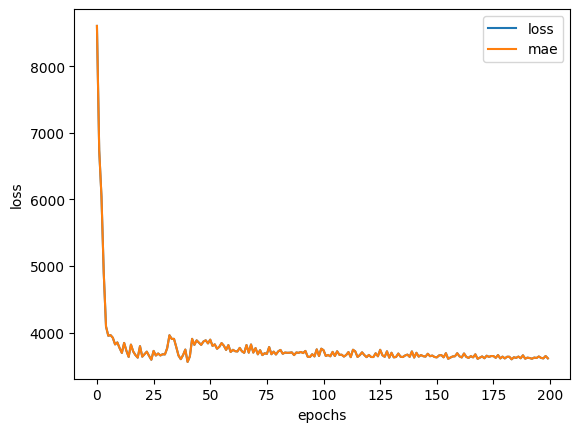

In [118]:
pd.DataFrame(hist.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Pre-Processing Data (Normalization and Standardization)

In [119]:
# Normalize

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

X = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct.fit(X_train)

X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [121]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [122]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [123]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

In [124]:
# neural network model

tf.random.set_seed(42)


insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics=["mae"],
                                 )
y_train = np.asarray(y_train).astype(np.float32)

insurance_model.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 13297.4160 - mae: 13297.4160
Epoch 2/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13288.5635 - mae: 13288.5635
Epoch 3/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13266.2656 - mae: 13266.2656
Epoch 4/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13218.5918 - mae: 13218.5918
Epoch 5/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13133.6807 - mae: 13133.6807
Epoch 6/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 13000.6875 - mae: 13000.6875
Epoch 7/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12809.4062 - mae: 12809.4062
Epoch 8/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12549.8555 - mae: 12549.8555
Epoch 9/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 12212.5879 - mae: 12212.5879
Epoch 10/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11795.0801 - mae: 11795.0801
Epoch 11/100
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11311.2559 - mae: 11311.2559
Epoch 12/100
34/34 

In [125]:
y_test = np.asarray(y_test).astype(np.float32)

insurance_model.evaluate(X_test_normal, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 3510.4902 - mae: 3510.4902


[3424.967041015625, 3424.967041015625]

## End of the Regression Notebook